# Speech Emotion Recognition 

emotions: [happy, sad, neutral, fear, angry, disgust]

Datasets:
* Crowd-sourced Emotional Multimodal Actors Dataset (Crema-D)
* Ryerson Audio-Visual Database of Emotional Speech and Song (Ravdess)
* Surrey Audio-Visual Expressed Emotion (Savee)
* Toronto Emotional Speech Set (Tessa)

## 데이터셋 다운로드

In [1]:
import opendatasets as od

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/ejlok1/cremad")

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/uwrfkaggler/ravdess-emotional-speech-audio")

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/ejlok1/surrey-audiovisual-expressed-emotion-savee")

In [ ]:
od.download(
    "https://www.kaggle.com/datasets/ejlok1/toronto-emotional-speech-set-tess")

## 파일목록을 DataFrame으로 (label 찾기)

In [3]:
import os
import pandas as pd
import numpy as np

In [21]:
RAVDESS = "test/ravdess-emotional-speech-audio/audio_speech_actors_01-24/"
CREMA = "test/cremad/AudioWAV/"
TESS = "test/toronto-emotional-speech-set-tess/tess toronto emotional speech set data/TESS Toronto emotional speech set data/"
SAVEE = "test/surrey-audiovisual-expressed-emotion-savee/ALL/"

### 1. Ravdess Dataframe

- 1440 files
- 레이블 예시 03-01-**"06"**-01-02-01-12.wav.

In [22]:
ravdess_dir_lis = os.listdir(RAVDESS)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    '01' : 'neutral',
    '03' : 'happy',
    '04' : 'sad',
    '05' : 'angry',
    '06' : 'fear',
    '07' : 'disgust',
}

for directory in ravdess_dir_lis:
    actor_files = os.listdir(os.path.join(RAVDESS, directory))
    for audio_file in actor_files: 
        part = audio_file.split('.')[0]
        key = part.split('-')[2]
        if key in emotion_dic:
            gender_code = int(part.split('-')[6])
            path_list.append(f"{RAVDESS}{directory}/{audio_file}")
            gender_list.append('female' if gender_code & 1 == 0 else 'male')
            emotion_list.append(emotion_dic[key])
            
ravdess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

ravdess_df.head()

,path,sex,emotion
0,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
1,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
2,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
3,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
4,test/ravdess-emotional-speech-audio/audio_spee...,male,happy


### 2. Crema-D Dataframe

- 7,442 files
- 레이블 예시 1001_DFA_**"ANG"**_XX.wav.

In [23]:
crema_dir_list = os.listdir(CREMA)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'HAP' : 'happy',
    'NEU' : 'neutral',
    'SAD' : 'sad',
    'ANG' : 'angry',
    'FEA' : 'fear',
    'DIS' : 'disgust',
}

female_id_list = [
    '1002', '1003', '1004', '1006', '1007', '1008', '1009', '1010', '1012', '1013', '1018', 
    '1020', '1021', '1024', '1025', '1028', '1029', '1030', '1037', '1043', '1046', '1047', 
    '1049', '1052', '1053', '1054', '1055', '1056', '1058', '1060', '1061', '1063', '1072', 
    '1073', '1074', '1075', '1076', '1078', '1079', '1082', '1084', '1089', '1091',
]

for audio_file in crema_dir_list:
    part = audio_file.split('_')
    key = part[2]
    if key in emotion_dic and part[3] == 'HI.wav':
        path_list.append(f"{CREMA}{audio_file}")
        gender_list.append('female' if part[0] in female_id_list else 'male')
        emotion_list.append(emotion_dic[key])

crema_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

crema_df.head()

,path,sex,emotion
0,test/cremad/AudioWAV/1001_IEO_ANG_HI.wav,male,angry
1,test/cremad/AudioWAV/1001_IEO_DIS_HI.wav,male,disgust
2,test/cremad/AudioWAV/1001_IEO_FEA_HI.wav,male,fear
3,test/cremad/AudioWAV/1001_IEO_HAP_HI.wav,male,happy
4,test/cremad/AudioWAV/1001_IEO_SAD_HI.wav,male,sad


### 3. Tess Dataframe

- 2,800 files
- 레이블 예시 OAF_base_**"fear"**.wav.

In [24]:
tess_dir_list = os.listdir(TESS)
path_list = []
gender_list = []
emotion_list = [] 

emotion_dic = {
    'happy'   : 'happy',
    'neutral' : 'neutral',
    'sad'     : 'sad',
    'Sad'     : 'sad',
    'angry'   : 'angry',
    'fear'    : 'fear',
    'disgust'  : 'disgust',
}

for directory in tess_dir_list:
    audio_files = os.listdir(os.path.join(TESS, directory))
    for audio_file in audio_files:
        part = audio_file.split('.')[0]
        key = part.split('_')[2]
        if key in emotion_dic:
            path_list.append(f"{TESS}{directory}/{audio_file}") 
            gender_list.append('female') # female only dataset
            emotion_list.append(emotion_dic[key])
            
tess_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

tess_df.head()

,path,sex,emotion
0,test/toronto-emotional-speech-set-tess/tess to...,female,angry
1,test/toronto-emotional-speech-set-tess/tess to...,female,angry
2,test/toronto-emotional-speech-set-tess/tess to...,female,angry
3,test/toronto-emotional-speech-set-tess/tess to...,female,angry
4,test/toronto-emotional-speech-set-tess/tess to...,female,angry


### 4. Savee Dataframe

- 480 files
- 레이블 예시 DC_**"a"**02.wav.

In [25]:
savee_dir_list = os.listdir(SAVEE)
path_list = []
gender_list = []
emotion_list = []

emotion_dic = {
    'h'  : 'happy',
    'n'  : 'neutral',
    'sa' : 'sad',
    'a'  : 'angry',
    'f'  : 'fear',
    'd'  : 'disgust'
}

for audio_file in savee_dir_list:
    part = audio_file.split('_')[1]
    key = part[:-6]
    if key in emotion_dic:
        path_list.append(f"{SAVEE}{audio_file}")
        gender_list.append('male') # male only dataset
        emotion_list.append(emotion_dic[key])
        
savee_df = pd.concat([
    pd.DataFrame(path_list, columns=['path']),
    pd.DataFrame(gender_list, columns=['sex']),
    pd.DataFrame(emotion_list, columns=['emotion'])
], axis=1)

savee_df.head()

,path,sex,emotion
0,test/surrey-audiovisual-expressed-emotion-save...,male,angry
1,test/surrey-audiovisual-expressed-emotion-save...,male,angry
2,test/surrey-audiovisual-expressed-emotion-save...,male,angry
3,test/surrey-audiovisual-expressed-emotion-save...,male,angry
4,test/surrey-audiovisual-expressed-emotion-save...,male,angry


In [26]:
df = pd.concat([
    ravdess_df, 
    crema_df, 
    tess_df, 
    savee_df
], axis=0)
df.head()

,path,sex,emotion
0,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
1,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
2,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
3,test/ravdess-emotional-speech-audio/audio_spee...,male,neutral
4,test/ravdess-emotional-speech-audio/audio_spee...,male,happy


In [27]:
df.drop('sex', axis=1, inplace=True)
df.head()

,path,emotion
0,test/ravdess-emotional-speech-audio/audio_spee...,neutral
1,test/ravdess-emotional-speech-audio/audio_spee...,neutral
2,test/ravdess-emotional-speech-audio/audio_spee...,neutral
3,test/ravdess-emotional-speech-audio/audio_spee...,neutral
4,test/ravdess-emotional-speech-audio/audio_spee...,happy


# 전처리

- 음성 데이터 같은 길이로 패딩

In [28]:
from pydub import AudioSegment, effects
import librosa

In [73]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [29]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

# feature 추출

1. MFCC(Mel-Frequency Cepstral Coefficients)
2. Zero Crossing Rate
3. Root Mean Square Energy

In [30]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

In [31]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

# 모델

- LSTM

In [5]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [16]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [6]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [ ]:
MODEL = Sequential()
MODEL.add(layers.LSTM(64, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(64))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

In [ ]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
mcp_save = callbacks.ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model = MODEL.fit(X_train, y_train_class, epochs=300, batch_size=32, validation_data=(X_val, y_val_class), callbacks=[mcp_save])

In [19]:
MODEL = Sequential()
MODEL.add(layers.LSTM(256, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(256))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 352, 256)          278528    
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense (Dense)                (None, 6)                 1542      
Total params: 805,382
Trainable params: 805,382
Non-trainable params: 0
_________________________________________________________________
None


In [20]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
mcp_save = callbacks.ModelCheckpoint('.mdl_wts_256.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model = MODEL.fit(X_train, y_train_class, epochs=300, batch_size=32, validation_data=(X_val, y_val_class), callbacks=[mcp_save])

Epoch 1/300
112/112 [==============================] - 127s 1s/step - loss: 1.8015 - categorical_accuracy: 0.2421 - val_loss: 1.4493 - val_categorical_accuracy: 0.3326
Epoch 2/300
112/112 [==============================] - 130s 1s/step - loss: 1.3967 - categorical_accuracy: 0.4015 - val_loss: 1.3795 - val_categorical_accuracy: 0.4072
Epoch 3/300
112/112 [==============================] - 133s 1s/step - loss: 1.2506 - categorical_accuracy: 0.4958 - val_loss: 1.1743 - val_categorical_accuracy: 0.5385
Epoch 4/300
112/112 [==============================] - 132s 1s/step - loss: 1.1842 - categorical_accuracy: 0.5276 - val_loss: 1.1325 - val_categorical_accuracy: 0.5792
Epoch 5/300
112/112 [==============================] - 135s 1s/step - loss: 1.0977 - categorical_accuracy: 0.5687 - val_loss: 1.0172 - val_categorical_accuracy: 0.5905
Epoch 6/300
112/112 [==============================] - 136s 1s/step - loss: 1.0119 - categorical_accuracy: 0.5971 - val_loss: 1.0004 - val_categorical_accuracy:

KeyboardInterrupt: 

180000

#### LSTM 확대

In [10]:
import os
import pandas as pd
import numpy as np

In [11]:
from pydub import AudioSegment, effects
import librosa

In [76]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    if (len(trimmed) > 180000):
        padded = trimmed[:180000]
    else:
        padded = np.pad(trimmed, (0, 180000-len(trimmed)), 'constant')
    return padded, sr

In [77]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

def encode(label):
    return emotion_dic.get(label)

In [78]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio(row.path)

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.emotion))
    except:
        print(f"Failed for path: {row.path}")

In [79]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

# 모델

In [80]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [81]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 6)
y_val_class = to_categorical(y_val, 6)

In [82]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks

In [83]:
MODEL = Sequential()
MODEL.add(layers.LSTM(256, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(256))
MODEL.add(layers.Dense(6, activation='softmax'))

print(MODEL.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 352, 256)          278528    
_________________________________________________________________
lstm_7 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 1542      
Total params: 805,382
Trainable params: 805,382
Non-trainable params: 0
_________________________________________________________________
None


In [84]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
mcp_save = callbacks.ModelCheckpoint('.mdl_wts_256.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model = MODEL.fit(X_train, y_train_class, epochs=100, batch_size=32, validation_data=(X_val, y_val_class), callbacks=[mcp_save])

Epoch 1/100
116/116 [==============================] - 203s 2s/step - loss: 1.7755 - categorical_accuracy: 0.2636 - val_loss: 1.7896 - val_categorical_accuracy: 0.2022
Epoch 2/100
116/116 [==============================] - 182s 2s/step - loss: 1.3634 - categorical_accuracy: 0.4264 - val_loss: 1.4063 - val_categorical_accuracy: 0.4154
Epoch 3/100
116/116 [==============================] - 184s 2s/step - loss: 1.1560 - categorical_accuracy: 0.5421 - val_loss: 1.3245 - val_categorical_accuracy: 0.4286
Epoch 4/100
116/116 [==============================] - 189s 2s/step - loss: 1.1492 - categorical_accuracy: 0.5499 - val_loss: 1.3284 - val_categorical_accuracy: 0.4615
Epoch 5/100
116/116 [==============================] - 188s 2s/step - loss: 1.0244 - categorical_accuracy: 0.5968 - val_loss: 0.9576 - val_categorical_accuracy: 0.6264
Epoch 6/100
116/116 [==============================] - 181s 2s/step - loss: 0.9619 - categorical_accuracy: 0.6309 - val_loss: 1.3444 - val_categorical_accuracy:

KeyboardInterrupt: 

# 6. Evaluate and conclude

Let's see how good are model is. 

In [21]:
from sklearn.metrics import confusion_matrix

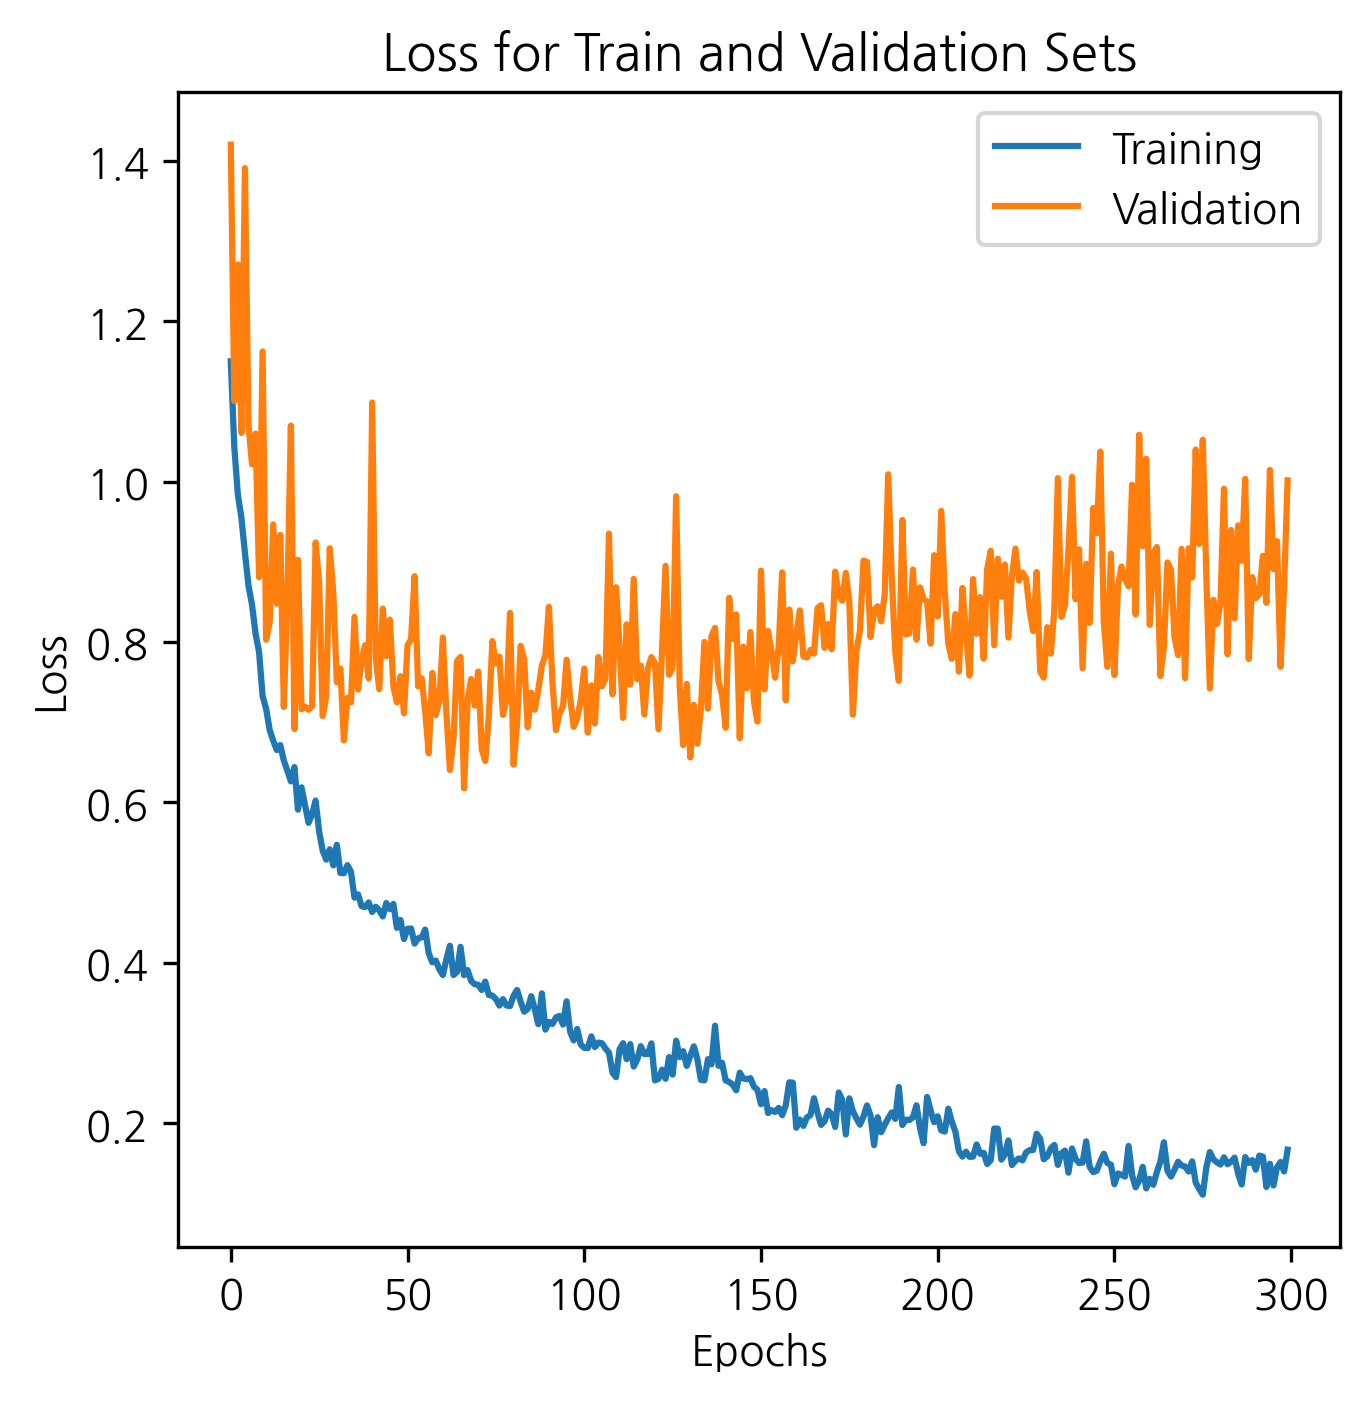

In [22]:
plt.figure(figsize=(5, 5)) 
plt.plot(model.history['loss'])
plt.plot(model.history['val_loss'])
plt.title('Loss for Train and Validation Sets')
plt.ylabel('Loss') 
plt.xlabel('Epochs')
plt.legend(['Training','Validation']) 
plt.show()

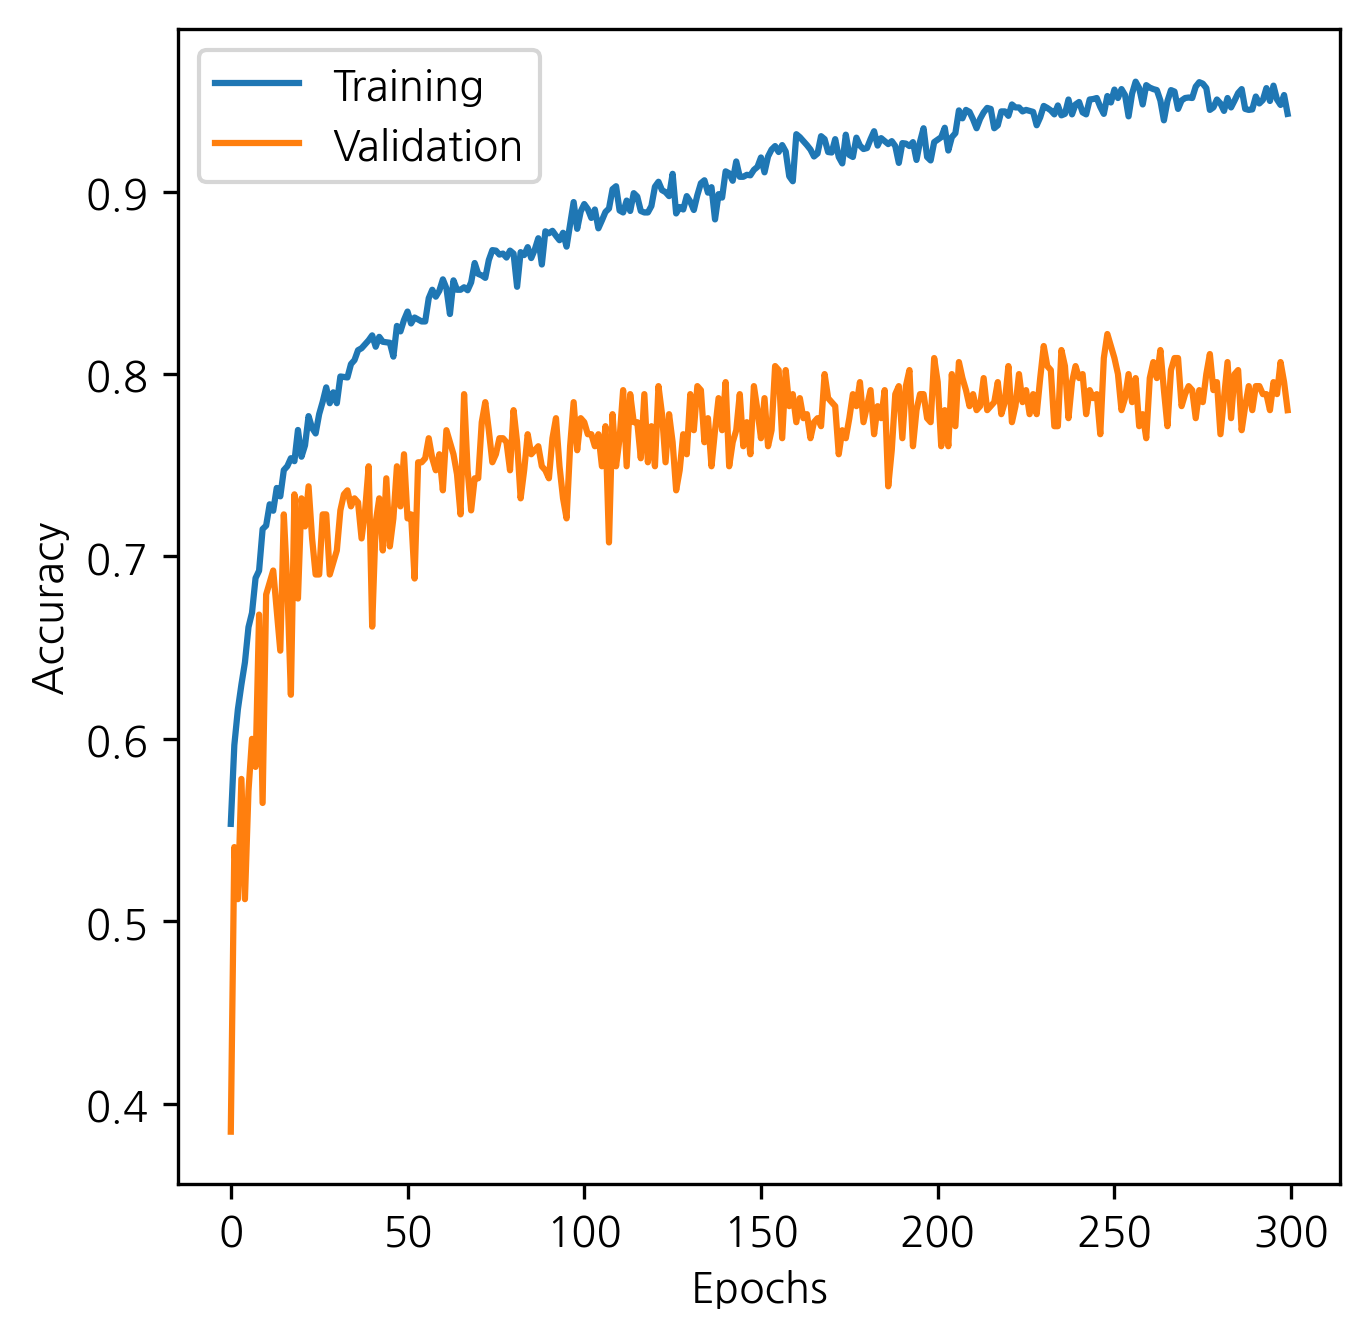

In [23]:
plt.figure(figsize=(5, 5)) 
plt.plot(model.history['categorical_accuracy'])
plt.plot(model.history['val_categorical_accuracy'])
plt.ylabel('Accuracy') 
plt.xlabel('Epochs') 
plt.legend(['Training','Validation']) 
plt.show()

## 한글 음성 데이터에 대해 모델 평가

In [43]:
df = pd.read_csv("datasets/emotion_test.csv")

In [44]:
df = df[["wav_id","상황"]]

In [45]:
df

,wav_id,상황
0,5f7940c59e04b149046cc19a,happiness
1,5f100cc8b140144dfcff4b66,anger
2,5f0a7b09b140144dfcff21a8,anger
3,5fbca5c6576e9378b67acf76,neutral
4,5f8da1949e04b149046cd695,happiness
...,...,...
8788,5f5ccadc3bd6941613f6d194,disgust
8789,5fb8dfcacb503578af9edd68,disgust
8790,5f5f82b92e23c7161accd230,happiness
8791,5e36a893ee8206179943c292,disgust


In [9]:
emotion_dic = {'anger': 0, 'angry': 0, 'disgust': 0, 'fear': 0, 'happiness': 1,
                               'neutral': 1, 'sad': 2, 'sadness': 2, 'surprise': 6}

def encode(label):
    return emotion_dic.get(label)

In [8]:
emotion_dic = {
    'neutral' : 0,
    'happy'   : 1,
    'sad'     : 2, 
    'angry'   : 3, 
    'fear'    : 4, 
    'disgust' : 5
}

In [53]:
def preprocess_audio(path):
    _, sr = librosa.load(path)
    raw_audio = AudioSegment.from_file(path)
    
    samples = np.array(raw_audio.get_array_of_samples(), dtype='float32')
    trimmed, _ = librosa.effects.trim(samples, top_db=25)
    if (len(trimmed) > 240000):
        padded = trimmed[:240000]
    else:
        padded = np.pad(trimmed, (0, 240000-len(trimmed)), 'constant')
    return padded, sr

In [54]:
zcr_list = []
rms_list = []
mfccs_list = []
emotion_list = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

i=0

for row in df.itertuples(index=False):
    try: 
        y, sr = preprocess_audio("datasets/emotion_audio_data/"+row.wav_id+".wav")

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        zcr_list.append(zcr)
        rms_list.append(rms)
        mfccs_list.append(mfccs)

        emotion_list.append(encode(row.상황))
    except:
        print(f"Failed for path: {row.wav_id}")

In [63]:
X[0][2]

array([ 1.00097656e-01,  6.08424225e+01,  4.22146545e+02,  1.33184509e+02,
       -4.98242798e+01,  4.64323349e+01, -2.76751461e+01, -2.42266808e+01,
       -2.36086273e+00, -2.23523769e+01, -8.99811745e+00,  3.85634537e+01,
        1.77953491e+01,  1.12275869e-01, -4.44258118e+00], dtype=float32)

In [55]:
X = np.concatenate((
    np.swapaxes(zcr_list, 1, 2), 
    np.swapaxes(rms_list, 1, 2), 
    np.swapaxes(mfccs_list, 1, 2)), 
    axis=2
)
X = X.astype('float32')

y = np.asarray(emotion_list)
y = np.expand_dims(y, axis=1).astype('int8')

In [56]:
MODEL = Sequential()
MODEL.add(layers.LSTM(128, return_sequences=True, input_shape=(X.shape[1:3])))
MODEL.add(layers.LSTM(128))
MODEL.add(layers.Dense(7, activation='softmax'))

print(MODEL.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 469, 128)          73728     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 7)                 903       
Total params: 206,215
Trainable params: 206,215
Non-trainable params: 0
_________________________________________________________________
None


In [57]:
X_train, X_to_split, y_train, y_to_split = train_test_split(X, y, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 7)
y_val_class = to_categorical(y_val, 7)

In [58]:
from keras.models import Sequential
from keras import layers, optimizers, callbacks
import keras

In [59]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
mcp_save = callbacks.ModelCheckpoint('.mdl_wts_korean_128.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model = MODEL.fit(X_train, y_train_class, epochs=100, batch_size=32, validation_data=(X_val, y_val_class), callbacks=[mcp_save])

Epoch 1/100
234/234 [==============================] - 78s 325ms/step - loss: 1.7433 - categorical_accuracy: 0.3198 - val_loss: 1.7376 - val_categorical_accuracy: 0.2958
Epoch 2/100
234/234 [==============================] - 75s 323ms/step - loss: 1.7091 - categorical_accuracy: 0.3226 - val_loss: 1.7215 - val_categorical_accuracy: 0.3055
Epoch 3/100
234/234 [==============================] - 76s 325ms/step - loss: 1.7046 - categorical_accuracy: 0.3303 - val_loss: 1.7422 - val_categorical_accuracy: 0.3001
Epoch 4/100
234/234 [==============================] - 77s 329ms/step - loss: 1.6989 - categorical_accuracy: 0.3382 - val_loss: 1.7094 - val_categorical_accuracy: 0.3142
Epoch 5/100
234/234 [==============================] - 77s 330ms/step - loss: 1.6820 - categorical_accuracy: 0.3339 - val_loss: 1.7052 - val_categorical_accuracy: 0.3164
Epoch 6/100
234/234 [==============================] - 77s 329ms/step - loss: 1.6630 - categorical_accuracy: 0.3517 - val_loss: 1.7165 - val_categoric

KeyboardInterrupt: 

In [32]:
model = keras.models.load_model('.mdl_wts_256.hdf5')

In [33]:
result = model.predict(X)

In [34]:
np.argmax(result,axis=1)

array([0, 0, 0, ..., 2, 0, 2], dtype=int64)

In [35]:
y.squeeze()

array([0, 0, 0, ..., 2, 2, 2], dtype=int8)

In [36]:
list(np.argmax(result,axis=1)==y.squeeze()).count(True)

3230

In [37]:
3230/len(y)

0.7457861925652274

In [58]:
1/6

0.16666666666666666

In [61]:
tmpX = X.copy()
tmpy = y.copy()

In [108]:
result = model.predict(tmpX)

In [111]:
result

array([[1.4858578e-02, 6.7407161e-02, 2.4383131e-01, 1.9385165e-02,
        6.0388696e-01, 5.0630808e-02],
       [2.7565801e-04, 7.4705612e-03, 9.7697347e-01, 3.5484384e-03,
        1.0574976e-02, 1.1567977e-03],
       [8.4776329e-03, 7.5393939e-01, 7.9144322e-04, 1.9908617e-01,
        3.4652557e-02, 3.0528065e-03],
       ...,
       [4.2038937e-03, 4.8345429e-01, 5.2626086e-03, 2.4919488e-01,
        3.1412321e-03, 2.5474310e-01],
       [3.0523732e-01, 3.6091286e-01, 1.3623715e-03, 2.1210983e-02,
        5.4534893e-03, 3.0582297e-01],
       [3.9429528e-07, 6.4288014e-07, 9.9993658e-01, 2.8139443e-06,
        3.2948926e-06, 5.6180652e-05]], dtype=float32)

In [112]:
np.argmax(result,axis=1)[:10]

array([4, 2, 1, 3, 1, 1, 4, 2, 1, 1], dtype=int64)

In [113]:
tmpy[:10]

array([[1],
       [3],
       [3],
       [0],
       [1],
       [2],
       [1],
       [2],
       [3],
       [3]], dtype=int8)

In [115]:
list(np.argmax(result,axis=1)==tmpy.squeeze()).count(True)

1430

In [128]:
model1 = keras.models.load_model('.mdl_wts_korean_128.hdf5')

In [129]:
result = model1.predict(tmpX)

In [130]:
np.argmax(result,axis=1)[:10]

array([1, 2, 3, 5, 3, 2, 0, 1, 2, 1], dtype=int64)

In [133]:
list(np.argmax(result,axis=1)==tmpy.squeeze()).count(True) / len(tmpy)

0.40334638661445354

In [135]:
X_train, X_to_split, y_train, y_to_split = train_test_split(tmpX, tmpy, test_size=0.15, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_to_split, y_to_split, test_size=0.3, random_state=1)

y_train_class = to_categorical(y_train, 7)
y_val_class = to_categorical(y_val, 7)

In [136]:
rlrop = callbacks.ReduceLROnPlateau(monitor='val_categorical_accuracy', factor=0.2, patience=70)
MODEL.compile(loss='categorical_crossentropy', optimizer='RMSProp', metrics=['categorical_accuracy'])
mcp_save = callbacks.ModelCheckpoint('.mdl_wts_korean_128.hdf5', save_best_only=True, monitor='val_loss', mode='min')
model = MODEL.fit(X_train, y_train_class, epochs=100, batch_size=32, validation_data=(X_val, y_val_class), callbacks=[mcp_save])

Epoch 1/100
224/224 [==============================] - 149s 658ms/step - loss: 1.6573 - categorical_accuracy: 0.3107 - val_loss: 1.6125 - val_categorical_accuracy: 0.3390
Epoch 2/100
224/224 [==============================] - 145s 648ms/step - loss: 1.6131 - categorical_accuracy: 0.3347 - val_loss: 1.6064 - val_categorical_accuracy: 0.3492
Epoch 3/100
224/224 [==============================] - 144s 644ms/step - loss: 1.6167 - categorical_accuracy: 0.3408 - val_loss: 1.5964 - val_categorical_accuracy: 0.3390
Epoch 4/100
224/224 [==============================] - 143s 639ms/step - loss: 1.5907 - categorical_accuracy: 0.3527 - val_loss: 1.5908 - val_categorical_accuracy: 0.3446
Epoch 5/100
224/224 [==============================] - 144s 641ms/step - loss: 1.5931 - categorical_accuracy: 0.3500 - val_loss: 1.5931 - val_categorical_accuracy: 0.3424
Epoch 6/100
224/224 [==============================] - 142s 633ms/step - loss: 1.5870 - categorical_accuracy: 0.3677 - val_loss: 1.6218 - val_cat

Epoch 49/100
224/224 [==============================] - 138s 618ms/step - loss: 1.2469 - categorical_accuracy: 0.5002 - val_loss: 1.6657 - val_categorical_accuracy: 0.3808
Epoch 50/100
224/224 [==============================] - 139s 619ms/step - loss: 1.2545 - categorical_accuracy: 0.4923 - val_loss: 1.7419 - val_categorical_accuracy: 0.3593
Epoch 51/100
224/224 [==============================] - 143s 641ms/step - loss: 1.2158 - categorical_accuracy: 0.5130 - val_loss: 1.7812 - val_categorical_accuracy: 0.3525
Epoch 52/100
224/224 [==============================] - 141s 629ms/step - loss: 1.2251 - categorical_accuracy: 0.5170 - val_loss: 1.7718 - val_categorical_accuracy: 0.3435
Epoch 53/100
224/224 [==============================] - 142s 636ms/step - loss: 1.2006 - categorical_accuracy: 0.5263 - val_loss: 1.7786 - val_categorical_accuracy: 0.3616
Epoch 54/100
224/224 [==============================] - 145s 645ms/step - loss: 1.1977 - categorical_accuracy: 0.5165 - val_loss: 1.7746 - v

KeyboardInterrupt: 

In [38]:
t_z = []
t_r = []
t_m = []
t_e = []

FRAME_LENGTH = 2048
HOP_LENGTH = 512

for row in [["datasets/test/angry_1.wav","angry"],["datasets/test/sad_1.wav","sad"]]:
    try: 
        y, sr = preprocess_audio(row[0])

        zcr = librosa.feature.zero_crossing_rate(y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        rms = librosa.feature.rms(y=y, frame_length=FRAME_LENGTH, hop_length=HOP_LENGTH)
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13, hop_length=HOP_LENGTH)

        t_z.append(zcr)
        t_r.append(rms)
        t_m.append(mfccs)

        t_e.append(encode(row[1]))
    except:
        print(f"Failed for path: {row[0]}")

In [39]:
t_X = np.concatenate((
    np.swapaxes(t_z, 1, 2), 
    np.swapaxes(t_r, 1, 2), 
    np.swapaxes(t_m, 1, 2)), 
    axis=2
)
t_X = t_X.astype('float32')

t_y = np.asarray(t_e)
t_y = np.expand_dims(y, axis=1).astype('int8')

In [148]:
model = keras.models.load_model('.mdl_wts_256.hdf5')

In [40]:
t__r = model.predict_classes(t_X)

In [41]:
t__r

array([5, 5], dtype=int64)

In [42]:
t_e

[3, 2]

In [74]:
df.head(20)

,wav_id,상황
0,5f7940c59e04b149046cc19a,happiness
1,5f100cc8b140144dfcff4b66,anger
2,5f0a7b09b140144dfcff21a8,anger
3,5fbca5c6576e9378b67acf76,neutral
4,5f8da1949e04b149046cd695,happiness
5,5efab05c8bbcd61f551d2b4c,sad
6,5f886cc6111dfd48d40fe460,happiness
7,5f6d55539e04b149046cbcbe,sadness
8,5e337d0e5807b852d9e04c6b,anger
9,5fba399ccb503578af9ee17a,surprise
